<a href="https://colab.research.google.com/github/ParvazeMahmudBitto/CSE475_Machine-Learning/blob/main/CSE475_Machine-Learning%20/lab/lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [2]:
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 13.0MB/s]


In [3]:
df =  pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


# Prepare Dataset

In [5]:
df = df.drop(columns=["CustomerID"])

# Removing CustomerID because it is an identifier and does not contribute to clustering.

In [6]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [7]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


# Normalization

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# z-score normalization or standardization

In [9]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

# K-Means using elbow method

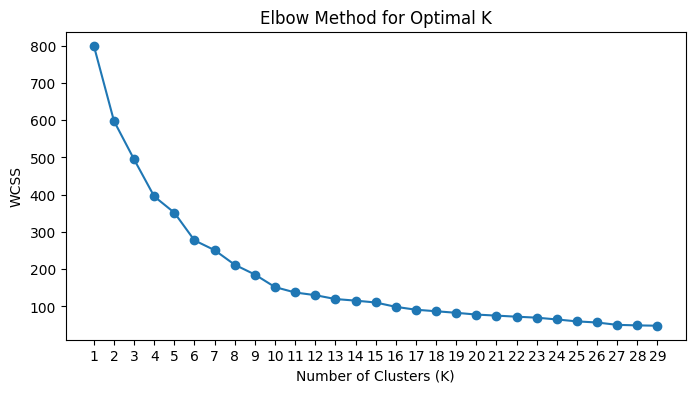

In [10]:
wcss = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,4))
plt.xticks(k_range)
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [11]:
optimal_k = 9

K = 9 is selected as the optimal number of clusters.

In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Apply DBSCAN

In [13]:
eps_values = range(1, 201)
min_samples_values = range(2, 20)

results = []

for eps_int in eps_values:
    eps = eps_int / 10

    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(scaled_data, labels)
        else:
            score = -1

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "clusters": n_clusters,
            "noise_points": n_noise,
            "silhouette": score
        })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(
    by=["silhouette","noise_points","min_samples","eps"],
    ascending=[False, False,True, True]
)

print(results_df.head(10))

     eps  min_samples  clusters  noise_points  silhouette
180  1.1            2         2             0    0.277604
198  1.2            2         2             0    0.277604
216  1.3            2         2             0    0.277604
234  1.4            2         2             0    0.277604
252  1.5            2         2             0    0.277604
270  1.6            2         2             0    0.277604
288  1.7            2         2             0    0.277604
306  1.8            2         2             0    0.277604
324  1.9            2         2             0    0.277604
342  2.0            2         2             0    0.277604


In [14]:
dbscan = DBSCAN(eps=1.1, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Applying GMM

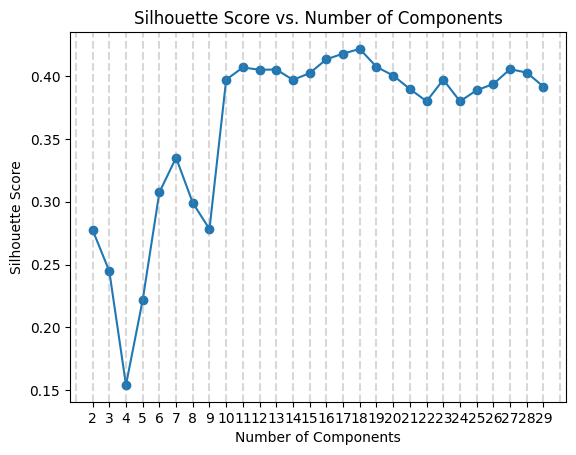

In [15]:
sil_scores = []
components = range(2, 30)
for k in components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(scaled_data, labels))
    else:
        sil_scores.append(-1)

plt.plot(components, sil_scores, marker='o')
plt.xticks(components)

for x in range(1, 31):
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.3)
plt.title("Silhouette Score vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.show()

In [16]:
optimal_n_components=18

In [17]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Evaluation

In [18]:
def evaluate(data, labels, name):
    if len(set(labels)) > 1:
        sil = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        print(f"{name}")
        print(f"  Silhouette Score: {sil:.3f}")
        print(f"  Davies-Bouldin Index: {dbi:.3f}\n")
    else:
        print(f"{name}: Cannot compute metrics\n")

evaluate(scaled_data, kmeans_labels, "KMeans")
evaluate(scaled_data, dbscan_labels, "DBSCAN")
evaluate(scaled_data, gmm_labels, "GMM")

KMeans
  Silhouette Score: 0.388
  Davies-Bouldin Index: 0.905

DBSCAN
  Silhouette Score: 0.278
  Davies-Bouldin Index: 1.612

GMM
  Silhouette Score: 0.278
  Davies-Bouldin Index: 1.289



# Applying PCA for visualization

In [19]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({
    "PCA1": pca_result[:,0],
    "PCA2": pca_result[:,1],
    "KMeans": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
})

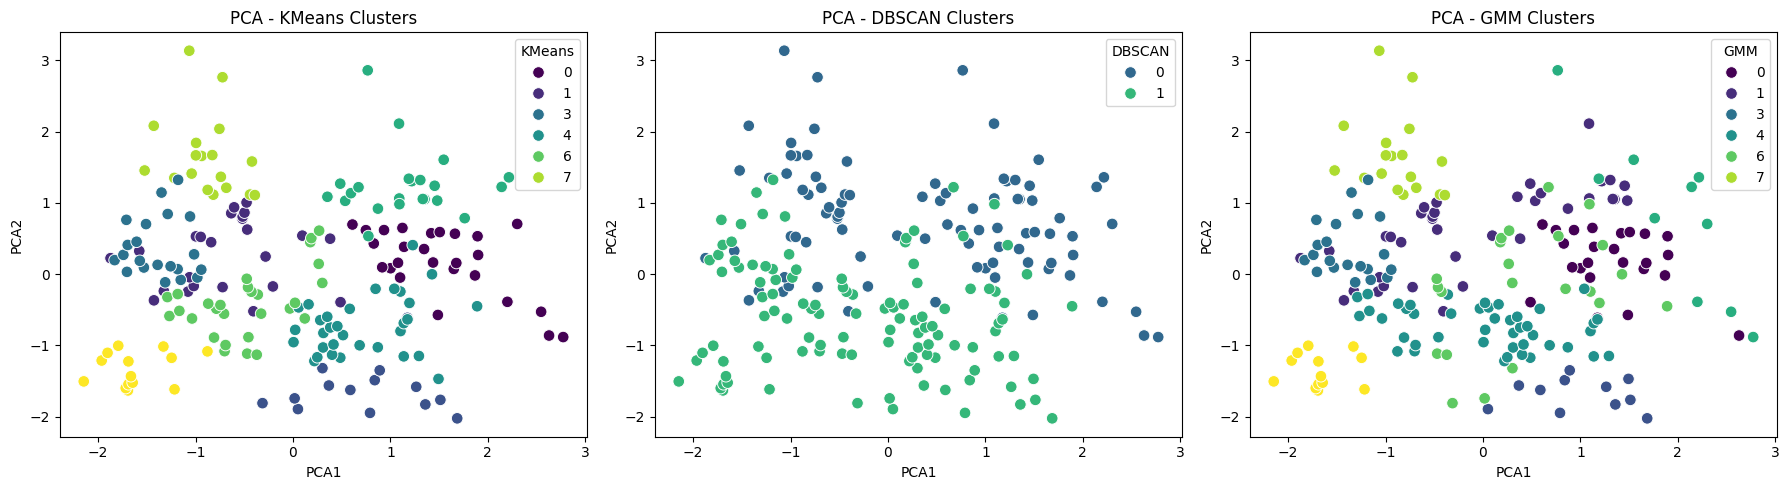

In [20]:
plt.figure(figsize=(18,5))

# KMeans
plt.subplot(1,3,1)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="KMeans", palette="viridis", s=70)
plt.title("PCA - KMeans Clusters")

# DBSCAN
plt.subplot(1,3,2)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="DBSCAN", palette="viridis", s=70)
plt.title("PCA - DBSCAN Clusters")

# GMM
plt.subplot(1,3,3)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="GMM", palette="viridis", s=70)
plt.title("PCA - GMM Clusters")

plt.tight_layout()
plt.show()

Clusters are moderately spaced, according to KMeans. There is some overlap between neighboring clusters. Clear grouping structure is visible.

DBSCAN: Two clusters were found. a huge collection of points. less separation than that of GMM and KMeans.

# Apply t-SNE

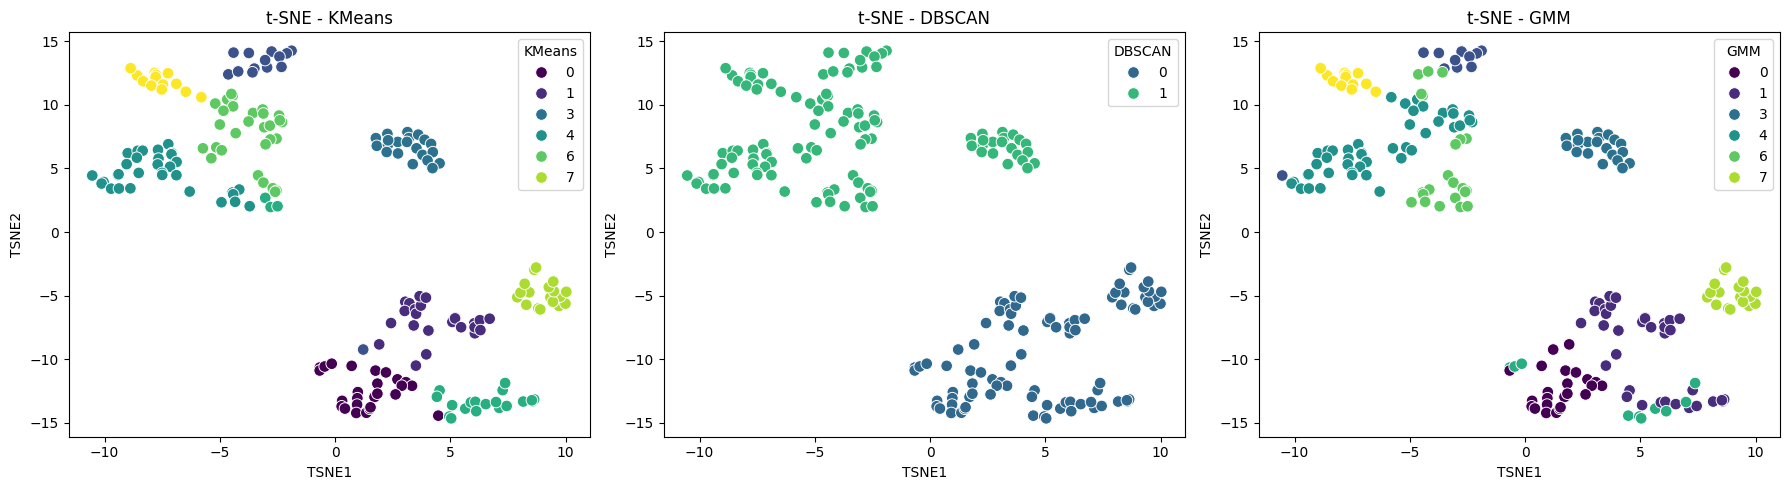

In [21]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)


tsne_df = pd.DataFrame({
    "TSNE1": tsne_result[:,0],
    "TSNE2": tsne_result[:,1],
    "KMeans": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
})


plt.figure(figsize=(18,5))

# KMeans
plt.subplot(1,3,1)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="KMeans", palette="viridis", s=70)
plt.title("t-SNE - KMeans")

# DBSCAN
plt.subplot(1,3,2)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="DBSCAN", palette="viridis", s=70)
plt.title("t-SNE - DBSCAN")

# GMM
plt.subplot(1,3,3)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="GMM", palette="viridis", s=70)
plt.title("t-SNE - GMM")

plt.tight_layout()
plt.show()

Because t-SNE concentrates on maintaining tight proximity between points such that similar data points remain clustered, it displays more distinct clusters than PCA.

KMeans: Clearly defined and distinct clusters. You can see distinct groups. robust cluster organization.

DBSCAN: Only two sizable clusters emerged. segmentation that is less thorough. Some structure was disregarded.